Fitted parameters:
Depth: -448.850521278826
x0 (mean): 0.05764627114226869
sigma (std dev): 0.0032495840696174475
Background: 625.100187396826
FWHM: 0.007652185705148413
FWHM in time: 0.025524944010260637 ns
Energy: 2.595919562971978e-23 J
Energy: 0.0001620245550885982 eV


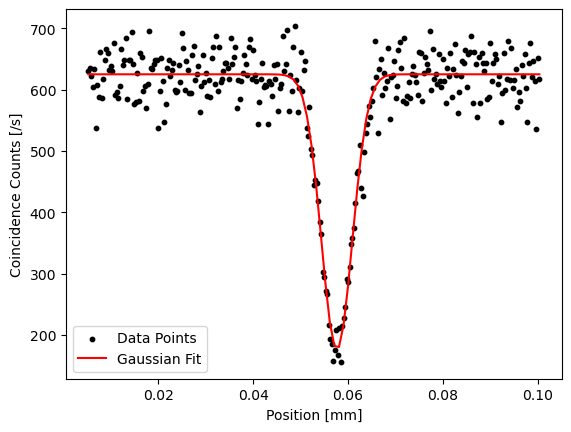

In [27]:
# import data

import os
import sys

filename = "data.txt"

data = []
with open(filename, 'r') as file:
    for line in file:
        # Remove leading/trailing whitespace and split by comma
        parts = line.split(' ')
        # Remove any whitespace from each part
        parts = [part.strip() for part in parts if part.strip()]
        # Convert to integers and append to data list
        data.append([float(part) for part in parts])

positions = []
coincidences = []

# Print the data to verify
for row in data:
    positions.append(row[0])
    coincidences.append(row[5])

# plotting

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()
# Set the x-axis to be the positions
ax.set_xlabel('Position [mm]')
# Set the y-axis to be the coincidence counts
ax.set_ylabel('Coincidence Counts [/s]')

ax.scatter(positions, coincidences, label='Data Points', color='black', s=10)

# fit gaussian
from scipy.optimize import curve_fit
def gaussian(x, a, x0, sigma, b):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + b

# Fit the data to the Gaussian function
popt, pcov = curve_fit(gaussian, positions, coincidences, p0=[-400, 0.06, 0.01, 700])
# Generate x values for the fitted curve
x_fit = np.linspace(min(positions), max(positions), 100)

ax.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Gaussian Fit')
# Add a legend
ax.legend()

print("Fitted parameters:")
print("Depth:", popt[0])
print("x0 (mean):", popt[1])
print("sigma (std dev):", popt[2])
print("Background:", popt[3])

# plot fwhm
def fwhm(x0, sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma
# Calculate the FWHM
fwhm_value = fwhm(popt[1], popt[2])
print("FWHM:", fwhm_value)

c = 2.99792458e8  # speed of light in m/s
delta_t = fwhm_value / c  # convert FWHM to time
print("FWHM in time:", delta_t * 1e9, "ns")  # convert to ns

h = 6.62607015e-34  # Planck's constant in J*s
E = h * c / fwhm_value  # energy in J
print("Energy:", E, "J")
# Convert energy to eV
E_eV = E / 1.602176634e-19  # convert to eV
print("Energy:", E_eV, "eV")


